# Fase 3


## Alunos: Thiago Rodrigues, Daniele Vitória, Gisele Menezes, Maria Eduarda Bandeira



## Observando o dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('https://raw.githubusercontent.com/Thiagorcj/Projeto-ICD/main/Acidentes_2021.csv', sep=';', engine='python', encoding='latin-1')
df.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,331693,01/01/2021,sexta-feira,00:02:00,SC,101.0,"314,9",LAGUNA,Ingestão de álcool pelo condutor,Colisão traseira,...,0,2,0,1,2,"-28,43029392","-48,84925073",SR-SC,UOP01,DEL02
1,331694,01/01/2021,sexta-feira,00:15:00,PR,376.0,188,MARIALVA,Velocidade Incompatível,Colisão com objeto,...,0,0,0,2,1,"-23,46634923","-51,82808011",SR-PR,UOP01,DEL09
2,331696,01/01/2021,sexta-feira,00:00:00,SP,116.0,"110,6",TAUBATE,Demais falhas mecânicas ou elétricas,Incêndio,...,0,1,0,0,1,"-23,03412614","-45,5526999",SR-SP,UOP01,DEL06
3,331699,01/01/2021,sexta-feira,01:20:00,SC,101.0,111,NAVEGANTES,Manobra de mudança de faixa,Colisão lateral,...,0,1,0,2,2,"-26,83955734","-48,71418074",SR-SC,UOP04,DEL04
4,331701,01/01/2021,sexta-feira,00:30:00,PE,101.0,"45,1",IGARASSU,Reação tardia ou ineficiente do condutor,Colisão traseira,...,1,1,0,1,2,"-7,86521297","-34,90715176",SR-PE,UOP02,DEL01


## Horários que mais acontecem acidentes
Primeiramente, foi gerado aproximações dos horários por meio de uma função. Depois, foi calculado quantas vezes cada horário aconteceu e , por fim, elabora-se gráficos de barra e linha com o eixo x igual aos horários e eixo y igual aos ao número de acidentes referentes aos horários.  

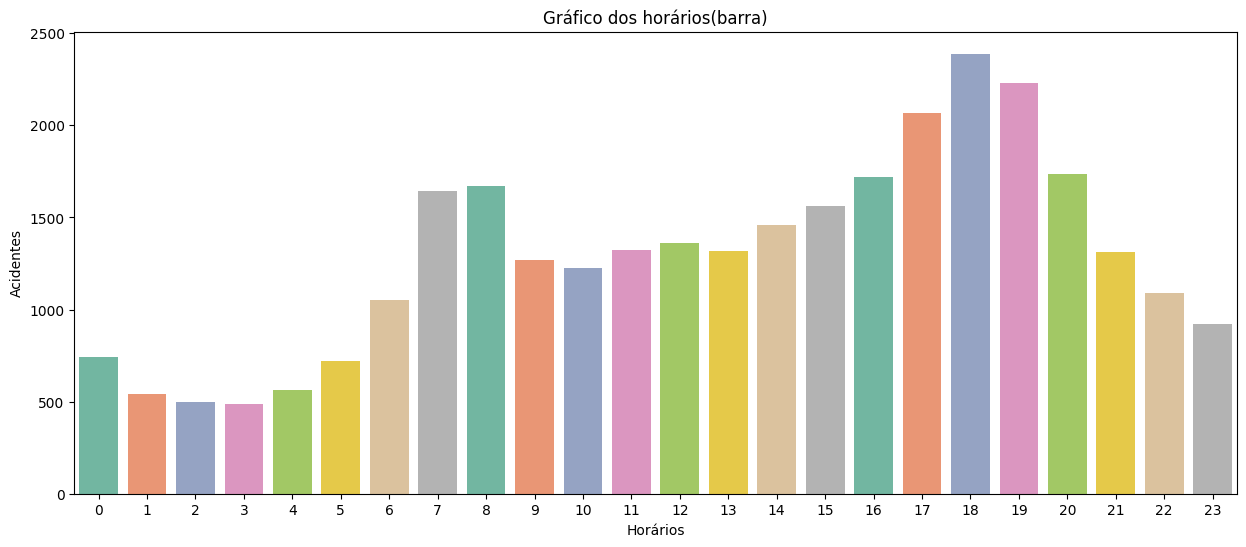

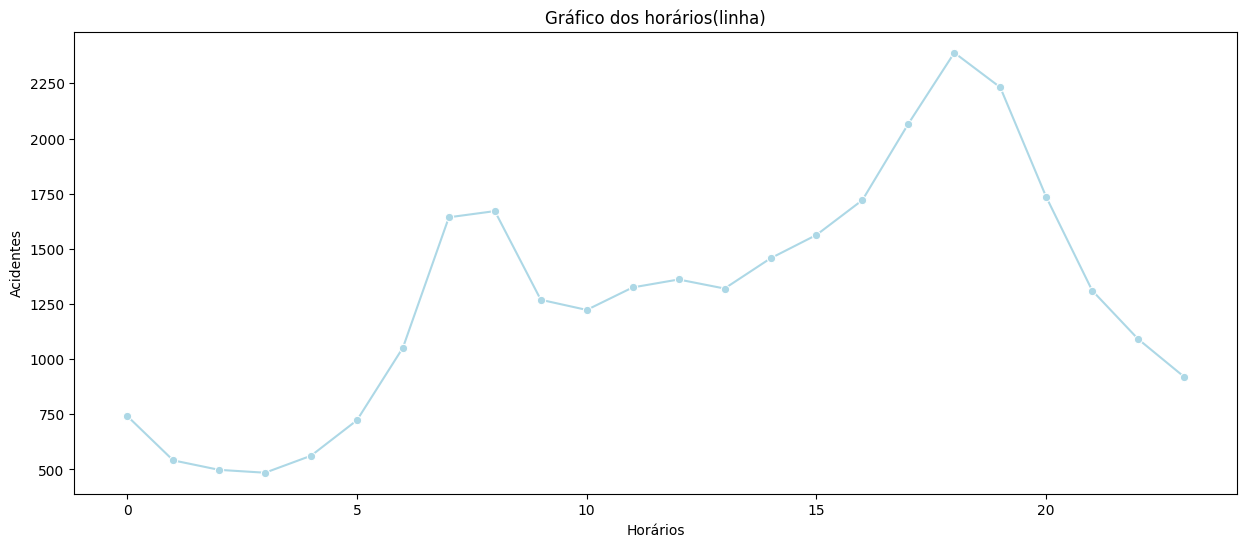

In [ ]:
#Função para aproximar os horários:
def horario(x):
  x,y,z = x.split(':')
  x,y,z = int(x),int(y),int(z)
  if z>30: 
    y +=1
    z = 0
  elif z<30: z = 0
  if y>30: 
    x+=1 
    y = 0
  elif y<0: y=0
  if x == 24: x = 0
  return x

#Calculando quantidade de acidentes por horário
df2 = df
df2['Horarios'] = df2['horario'].apply(horario)
df3 = pd.DataFrame()
df3['Horários'] = df2['Horarios'].value_counts().index
df3['Acidentes'] = df2['Horarios'].value_counts().values
#Gráfico de barras
plt.figure(figsize=(15,6))
plt.title("Gráfico dos horários(barra)")
sns.barplot(x=df3['Horários'],y=df3['Acidentes'],palette="Set2")
plt.show()
#Gráfico de linha
plt.figure(figsize=(15,6))
plt.title("Gráfico dos horários(linha)")
sns.lineplot(x=df3['Horários'],y=df3['Acidentes'],color="lightblue",marker="o")
plt.show()


## Acidentes por estado
Nesse gráfico, observa-se o número de acidentes por estado.

Text(0, 0.5, 'Número acidentes')

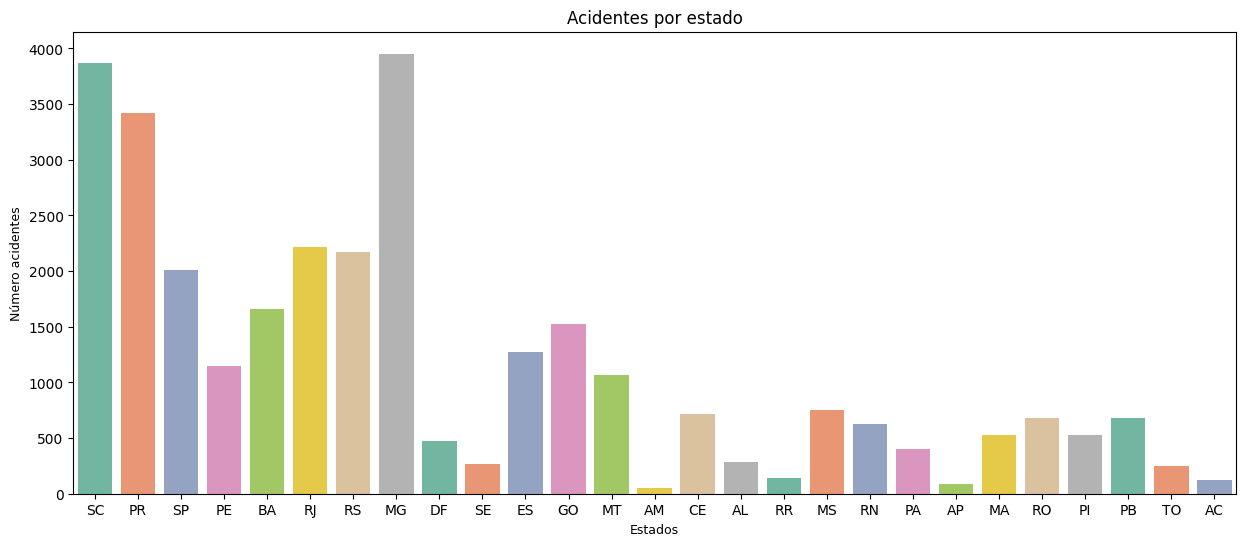

In [ ]:
plt.figure(figsize=(15,6))
plt.title("Acidentes por estado")
p = sns.countplot(x=df['uf'],palette="Set2")
p.set_xlabel("Estados", fontsize = 9)
p.set_ylabel("Número acidentes", fontsize = 9)

## Número de acidentes por dia da semana
Apresenta-se um gráfico com a relação entre os dias da semana e o número de acidentes. 

Tabela com dias da semana e quantidade de acidentes:

In [ ]:
dia_acidente = pd.DataFrame()
dia_acidente['dia_semana'] = df['dia_semana'].value_counts().index
dia_acidente['quantidade'] = df['dia_semana'].value_counts().values
dia_acidente.head()


,dia_semana,quantidade
0,sábado,5165
1,domingo,5088
2,sexta-feira,4880
3,segunda-feira,4164
4,quarta-feira,3916


Gráfico:

Text(0, 0.5, 'Dias da semana')

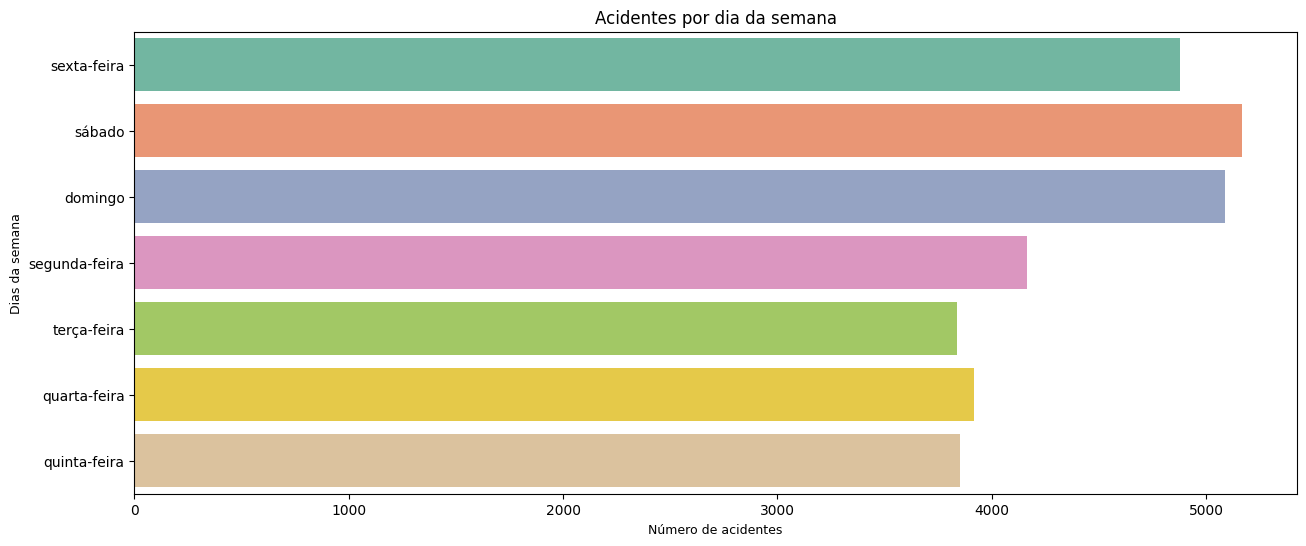

In [ ]:
plt.figure(figsize=(15,6))
plt.title("Acidentes por dia da semana")
p = sns.countplot(data=df, y='dia_semana', palette='Set2')
p.set_xlabel("Número de acidentes", fontsize = 9)
p.set_ylabel("Dias da semana", fontsize = 9)

## Feridos em acidentes por fase do dia:
O gráfico de dispersão abaixo relaciona o número de pessoas envolvidas e número de feridos com a fase do dia.

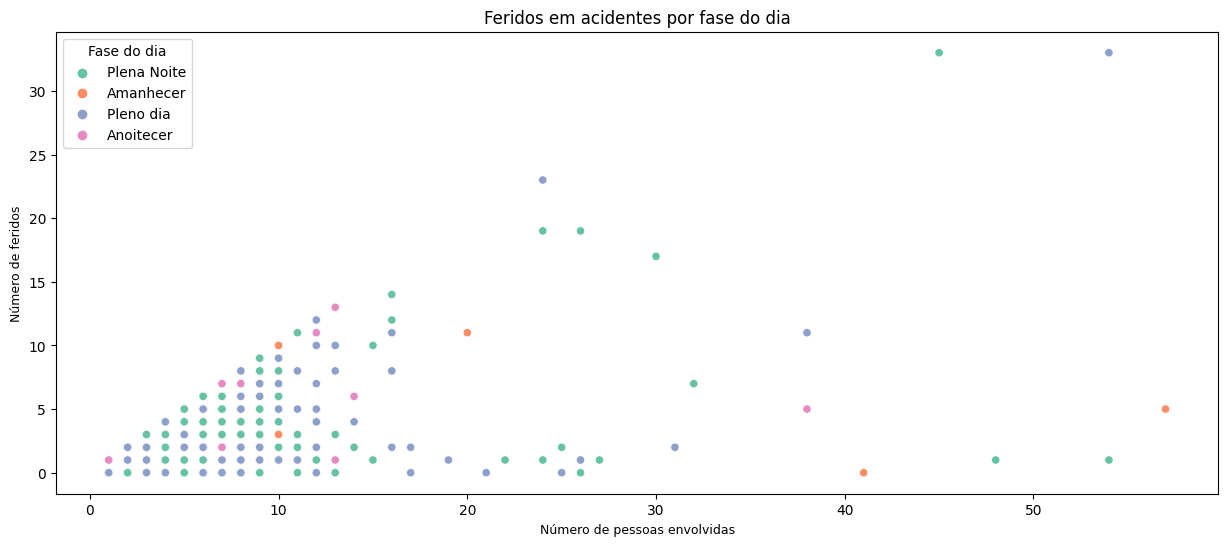

In [ ]:
plt.figure(figsize=(15,6))
plt.title("Feridos em acidentes por fase do dia")
p = sns.scatterplot( x= df['pessoas'], y= df['feridos'], hue= df['fase_dia'],palette='Set2')
p.set_xlabel("Número de pessoas envolvidas", fontsize = 9)
p.set_ylabel("Número de feridos", fontsize = 9)
plt.legend(title="Fase do dia")


## Veículos envolvidos em acidentes por estado
Gráfico apresenta a relação de veículos envolvidos em acidentes com estados do Brasil.

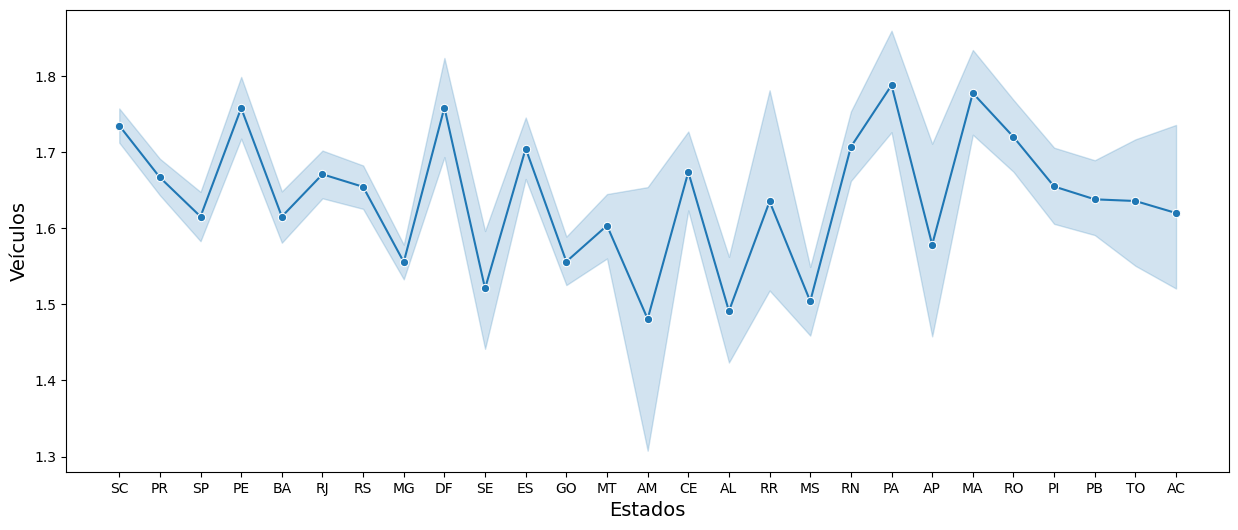

In [ ]:
ab = sns.lineplot(data = df, x='uf', y='veiculos', marker = 'o')
plt.xlabel('Estados', fontsize = 14)
plt.ylabel('Veículos', fontsize = 14)
ab.figure.set_size_inches(15, 6)